In [2]:
import re
import pandas as pd
import time
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from shapely import wkt


In [21]:
df = pd.read_csv(r"H:\Work n shiet\Repo GitHub\ParuVendu\table_totale_paru_vendu.csv", index_col=0)
df = df.drop(["nom_x", "nom_y", "code", "lien"], axis = 1)
df["departement"]= df["code_postal"].astype(str).str[:2]
df.index = range(len(df))
df['geometry'] = df['geometry'].apply(wkt.loads)
df.describe()

,nb de pièces,taille,prix,code_postal,code_insee,prix/m²
count,2363.000000,2363.000000,2.363000e+03,2363.000000,2363.000000,2363.000000
mean,4.050783,93.938214,4.332860e+05,85840.608125,85731.371562,5281.778333
std,2.055321,72.888339,3.774329e+05,8190.696815,8116.585392,3263.180084
min,1.000000,4.000000,2.500000e+04,75001.000000,75101.000000,433.600000
25%,3.000000,56.000000,2.370000e+05,77400.000000,77307.000000,3117.750000
50%,4.000000,80.000000,3.481500e+05,91280.000000,91223.000000,4151.200000
75%,5.000000,115.000000,4.993750e+05,93230.000000,93048.000000,6659.850000
max,15.000000,2200.000000,7.800000e+06,95880.000000,95675.000000,39000.000000


In [23]:
df.sort_values(["prix"])

,type de bien,nb de pièces,taille,carrez,prix,nom_ville,code_postal,code_insee,geometry,prix/m²,departement
1743,Maison,1,26,False,25000,Paley,77710,77353,"POLYGON ((2.8563804594325 48.221545656113, 2.8...",961.5,77
985,Appartement,1,4,False,44900,Paris,75015,75115,"POLYGON ((2.2897782765961 48.858123113769, 2.3...",11225.0,75
2055,Maison,1,88,False,50000,Villeneuve-sur-Bellot,77510,77512,"POLYGON ((3.3178651661759 48.893224244623, 3.3...",568.2,77
2065,Maison,1,60,False,55000,Villeneuve-sur-Bellot,77510,77512,"POLYGON ((3.3178651661759 48.893224244623, 3.3...",916.7,77
1440,Maison,3,31,False,55000,La Ferté-sous-Jouarre,77260,77183,"POLYGON ((3.1405620410595 48.958937493548, 3.1...",1774.2,77
...,...,...,...,...,...,...,...,...,...,...,...
906,Maison,7,280,False,3400000,Paris,75013,75113,"POLYGON ((2.365950820881 48.844908659278, 2.39...",12142.9,75
1653,Appartement,4,132,False,3400000,Paris,75007,75107,"POLYGON ((2.3207773515807 48.863075035941, 2.3...",25757.6,75
1551,Appartement,7,200,False,3650000,Paris,75007,75107,"POLYGON ((2.3207773515807 48.863075035941, 2.3...",18250.0,75
2009,Appartement,5,280,False,4500000,Paris,75016,75116,"POLYGON ((2.225670292257 48.859404562396, 2.23...",16071.4,75


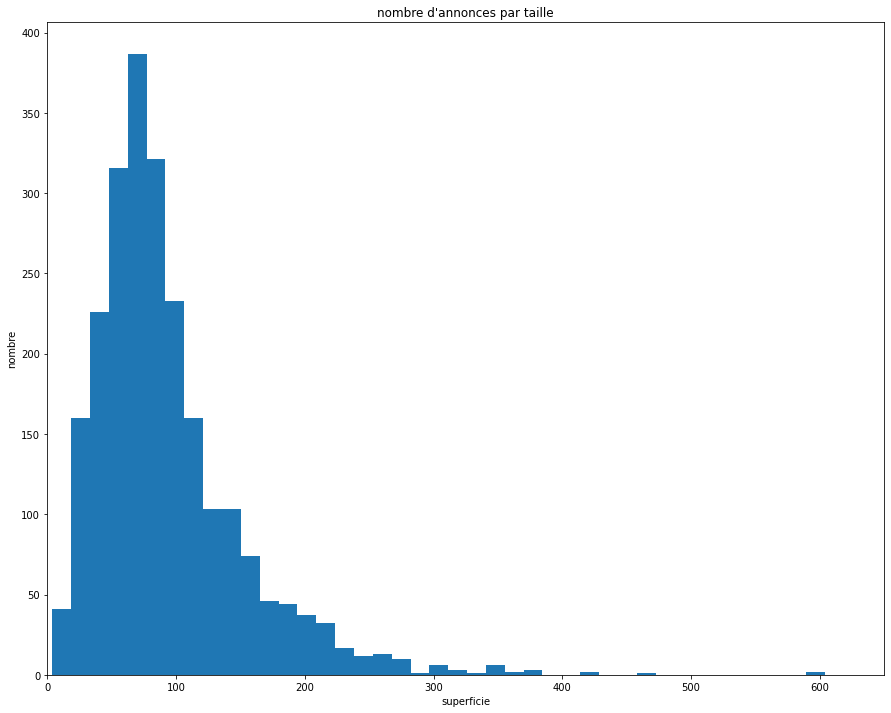

In [37]:
fig, ax = plt.subplots(figsize=(15, 12))

ax.hist(df["taille"].array, bins = 150)

ax.set(xlim=(0, 650), title = "nombre d'annonces par taille", ylabel = "nombre" , xlabel = "superficie" )

plt.show()

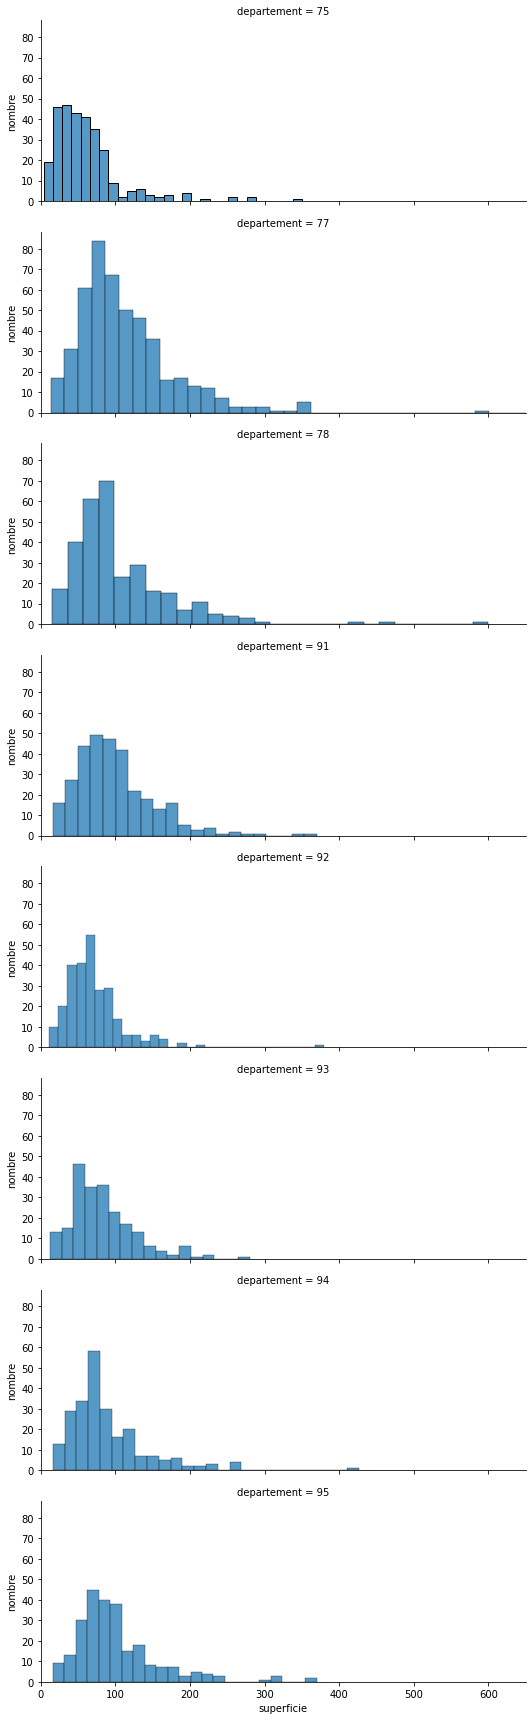

In [18]:
g = sns.FacetGrid(df, row="departement", aspect=2.5, row_order = ["75","77","78","91","92","93","94","95"])
g.map(sns.histplot, "taille")
g.set(xlim=(0,650), ylabel = "nombre" , xlabel = "superficie" )


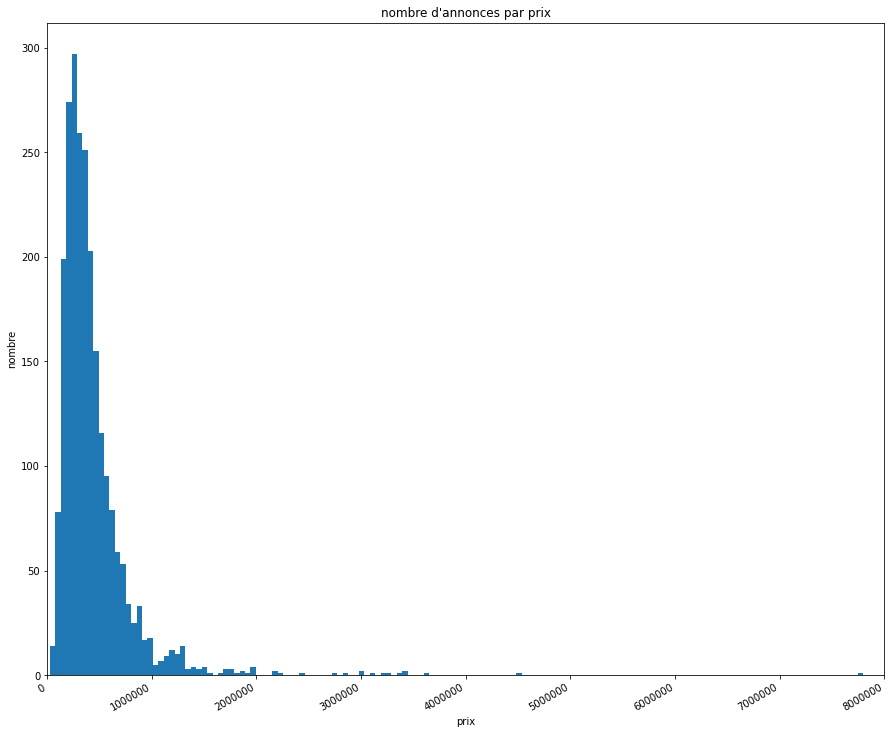

In [31]:
fig, ax = plt.subplots(figsize=(15, 12))

ax.hist(df["prix"].array, bins = 150)

ax.set(title = "nombre d'annonces par prix", ylabel = "nombre" , xlabel = "prix", xlim=(0, 8000000) )
ax.ticklabel_format(style="plain")
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

plt.show()

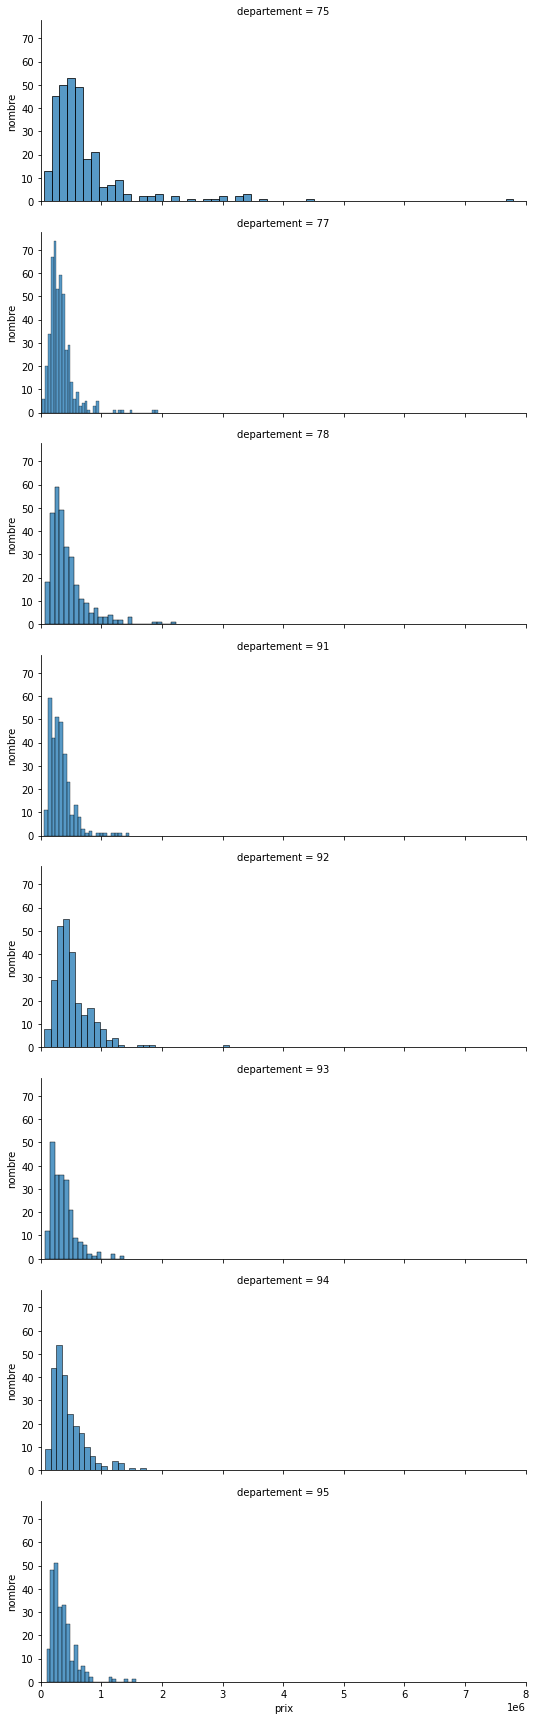

In [34]:
g = sns.FacetGrid(df, row="departement", aspect=2.5, row_order = ["75","77","78","91","92","93","94","95"])
g.map(sns.histplot, "prix")
g.set(ylabel = "nombre" , xlabel = "prix", xlim=(0, 8000000))

[Text(0, 0.5, 'prix en million'),
 Text(0.5, 0, 'nombre par dpt'),
 (0.0, 5000000.0)]

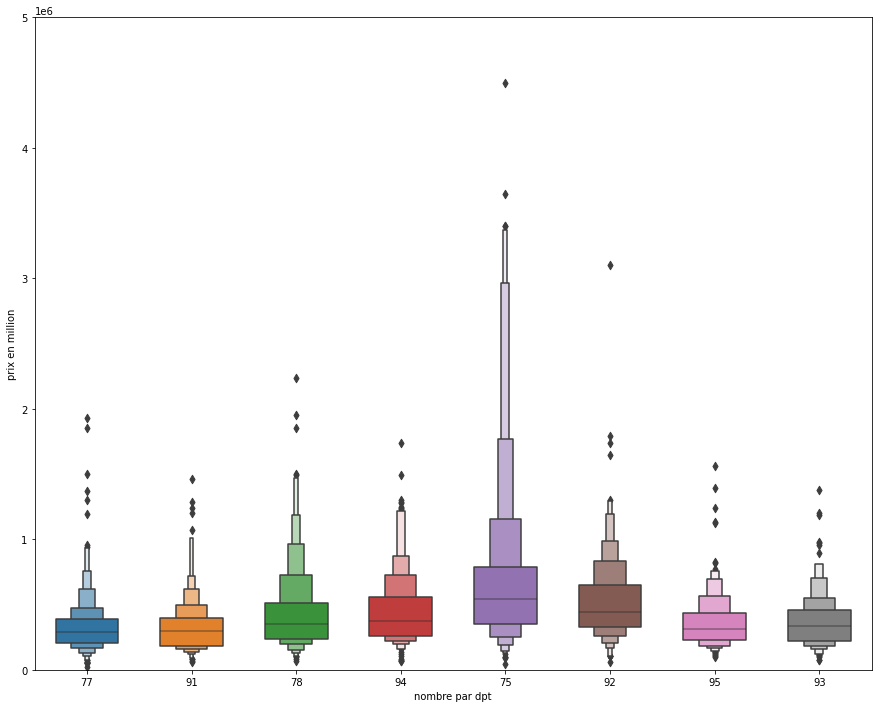

In [102]:
fig, ax = plt.subplots(figsize=(15, 12))

ax = sns.boxenplot(x="departement", y="prix", data=df, width=0.6)
#ax = sns.swarmplot(x="departement", y="prix", data=df, size = 2.5, color="black")
ax.set(ylabel = "prix en million" , xlabel = "nombre par dpt", ylim=(0, 5000000))


[Text(0, 0.5, 'prix en million'),
 Text(0.5, 0, 'nombre par dpt'),
 (0.0, 1500000.0)]

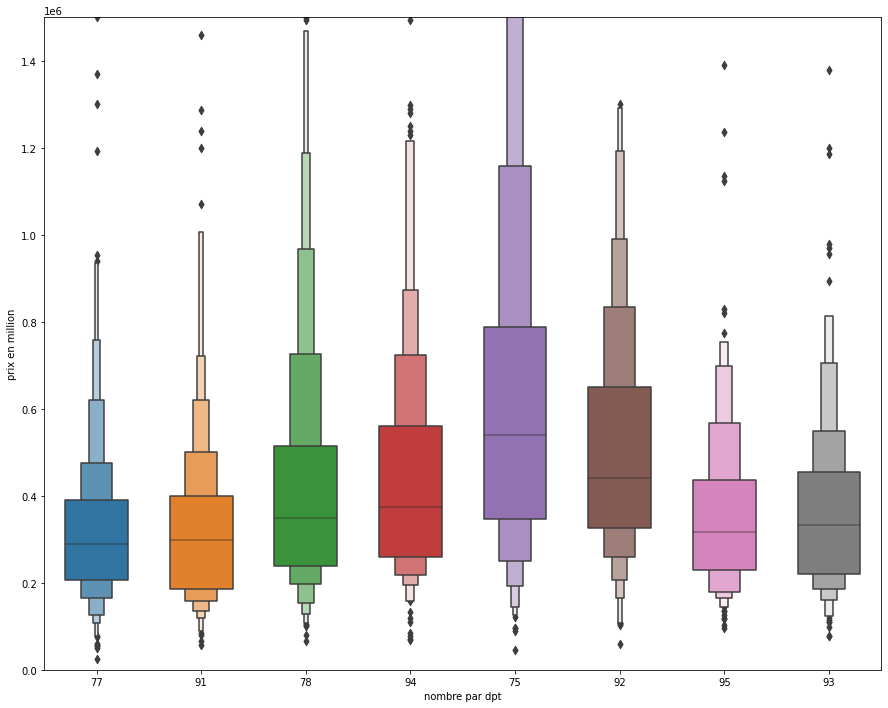

In [104]:
fig, ax = plt.subplots(figsize=(15, 12))

ax = sns.boxenplot(x="departement", y="prix", data=df, width=0.6)
#ax = sns.swarmplot(x="departement", y="prix", data=df, size = 2.5, color="black")
ax.set(ylabel = "prix en million" , xlabel = "nombre par dpt", ylim=(0, 1500000))


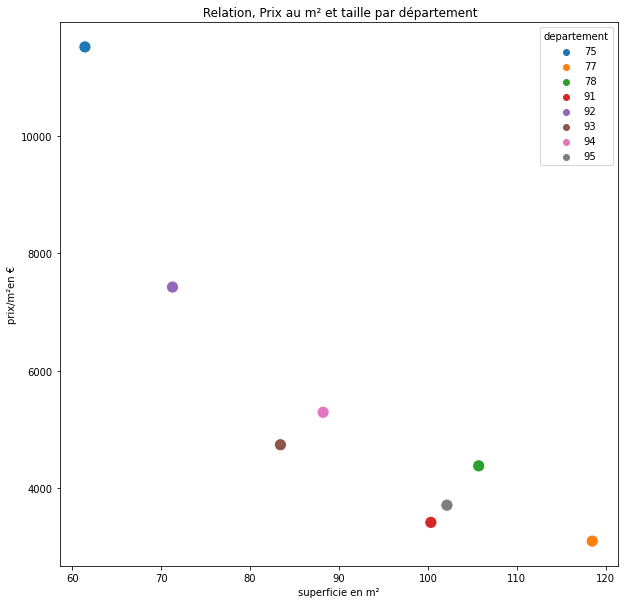

In [166]:
# Relation entre la surface et le prix au m²

dfg = df.groupby("departement").mean()


fig, ax = plt.subplots(figsize=(10,10))

ax = sns.scatterplot(x="taille", y="prix/m²",hue="departement", s=150, data=dfg)
#ax = sns.swarmplot(x="departement", y="prix", data=df, size = 2.5, color="black")
ax.set(ylabel = "prix/m²en €" , xlabel = "superficie en m²", title=" Relation, Prix au m² et taille par département")

plt.savefig("corr entre la taille et les prix au m² par dpt.png", dpi=200)

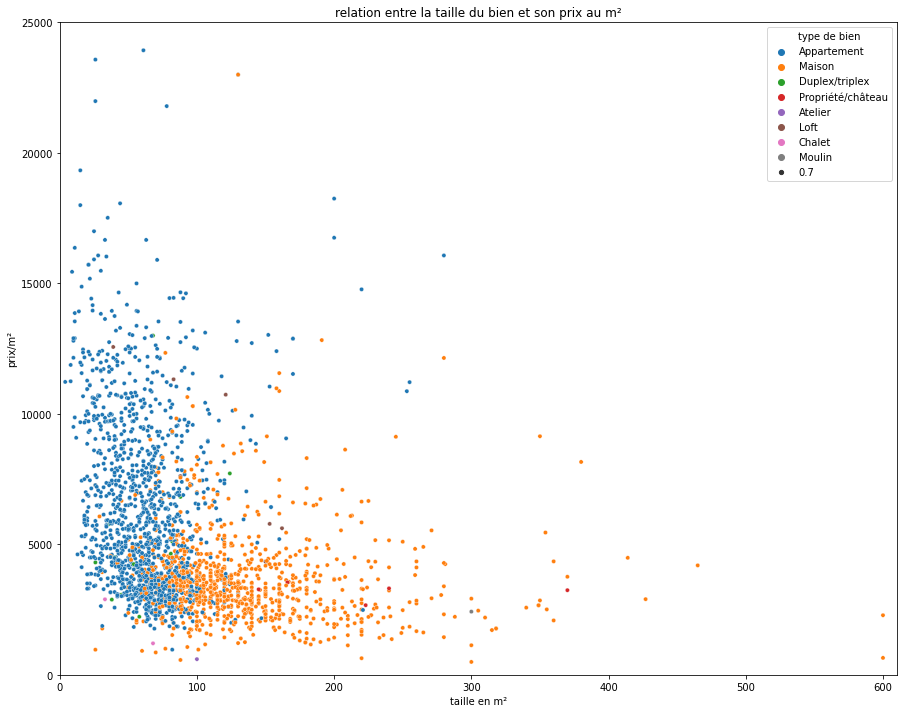

In [135]:
# Relation entre la surface et le prix au m²

fig, ax = plt.subplots(figsize=(15, 12))

ax = sns.scatterplot(x="taille", y="prix/m²",hue="type de bien" ,data=df, size=0.7)
#ax = sns.swarmplot(x="departement", y="prix", data=df, size = 2.5, color="black")
ax.set(ylabel = "prix/m² en euro" , xlabel = "taille en m²", ylim=(0, 25000), xlim=(0, 610), title= "relation entre la taille du bien et son prix au m²")

plt.savefig("corr entre la taille et les prix au m².png", dpi=200)

In [130]:
#aggregation mediane par département

df.groupby("departement").median()[["nb de pièces","taille","prix","prix/m²"]]

,nb de pièces,taille,prix,prix/m²
departement,,,,
75,2.0,52.0,540400.0,10860.15
77,4.0,99.0,289000.0,3000.00
78,4.0,86.0,350000.0,3967.70
91,4.0,91.0,299000.0,3350.00
92,3.0,65.0,441000.0,7275.20
93,3.5,77.0,333000.0,4289.00
94,4.0,73.0,375000.0,5000.00
95,4.0,89.0,316500.0,3650.00


In [123]:
#aggregation max par département

df.groupby("departement").max().round(2)[["nb de pièces","taille","prix","prix/m²"]]

,nb de pièces,taille,prix,prix/m²
departement,,,,
75,10,350,7800000,39000.0
77,15,2200,1930000,11562.5
78,15,600,2235000,10424.5
91,12,370,1460000,7152.8
92,10,380,3100000,13946.4
93,14,280,1380000,10678.6
94,12,427,1735000,12551.0
95,15,370,1565000,7789.5


In [124]:
#aggregation min par département

df.groupby("departement").min().round(2)[["nb de pièces","taille","prix","prix/m²"]]

,nb de pièces,taille,prix,prix/m²
departement,,,,
75,1,4,44900,5365.9
77,1,13,25000,433.6
78,1,15,66000,648.3
91,1,16,58000,1133.3
92,1,11,60000,600.0
93,1,12,77000,1833.3
94,1,16,69500,2724.1
95,1,16,95500,1521.2


In [125]:
#aggregation min par type de bien

df.groupby("type de bien").min().round(2)[["nb de pièces","taille","prix","prix/m²"]]

,nb de pièces,taille,prix,prix/m²
type de bien,,,,
Appartement,1,4,44900,963.4
Atelier,1,100,60000,600.0
Chalet,2,33,82000,1205.9
Duplex/triplex,2,26,109500,2224.1
Loft,2,39,490000,4340.0
Maison,1,26,25000,493.3
Moulin,8,300,726200,2420.7
Propriété/château,5,145,475000,433.6


In [127]:
#aggregation moy par type de bien

df.groupby("type de bien").median().round(2)[["nb de pièces","taille","prix","prix/m²"]]

,nb de pièces,taille,prix,prix/m²
type de bien,,,,
Appartement,3.0,62.0,290000.0,5363.65
Atelier,1.0,100.0,60000.0,600.00
Chalet,2.0,50.5,88750.0,2049.90
Duplex/triplex,3.0,58.0,229000.0,4500.00
Loft,4.0,121.0,885000.0,7613.60
Maison,5.0,120.0,398000.0,3409.10
Moulin,8.0,300.0,726200.0,2420.70
Propriété/château,8.0,231.5,695000.0,3259.55


In [138]:
import dataframe_image as dfi

dfi.export(df.groupby("type de bien").median()[["nb de pièces","taille","prix","prix/m²"]], 'aggregation med par type de bien.png' )
dfi.export(df.groupby("departement").median()[["nb de pièces","taille","prix","prix/m²"]], 'aggregation med par departement.png' )

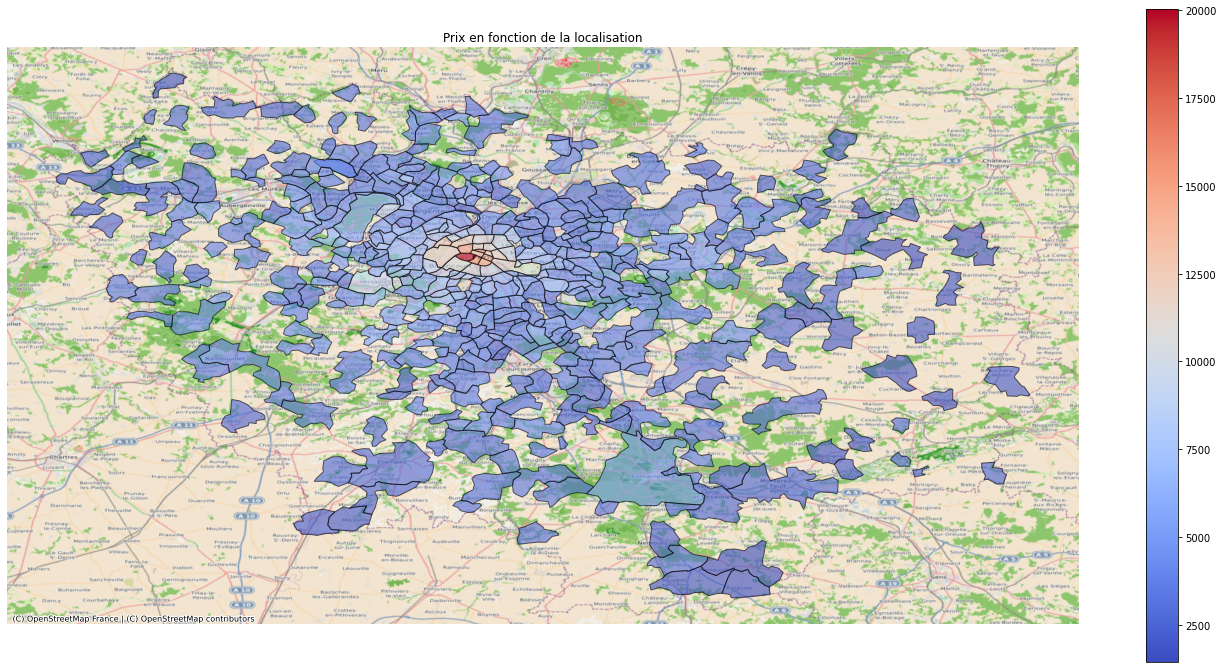

In [222]:
df = gpd.GeoDataFrame(df, geometry='geometry',crs="EPSG:4326")

df["prix/m²"]= round(df["prix"]/df["taille"],1)
ax = df.dissolve(by = "code_postal", aggfunc="median").plot(column="prix/m²",cmap="coolwarm", legend=True, alpha=0.6, figsize=(24, 12), edgecolor = 'k')
ax.set(title= "Prix en fonction de la localisation")
plt.axis('off')

cx.add_basemap(ax, crs = df.crs, source=cx.providers.OpenStreetMap.France)

In [225]:
#necessite branca et folium et mapclassify

df_temp = df[["code_postal","nb de pièces",	"taille", "prix","nom_ville","code_insee","geometry","prix/m²","departement"]]

df_temp = gpd.GeoDataFrame(df_temp, geometry='geometry',crs="EPSG:4326")

ax = df_temp.dissolve(by = "code_insee", aggfunc="mean").explore(column="prix/m²",cmap="coolwarm", legend=True, style_kwds=dict(color="black"), tiles="OpenStreetMap France")

#ax.set(title= "Prix en fonction de la localisation")
#plt.axis('off')
ax